# Machine Learning Model - Heart Disease Prediction 

The notebook uses Python machine learning and data science libraries to build a model to predict if a patient has heart disease based on underlying medical data. 

###### Outline of Project:
1. Problem Definition
2. Data
3. Evaluation
4. Data Features
5. Modeling
6. Experimentation


## 1. Problem Definition

Based on the patient medical data provided, the objective of this project is to implement a binary classification machine learning model to predict if the patient has heart disease.


## 2. Data

The original source of the data used to produce this model can be found at the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Heart%20Disease


## 3. Evaluation

Evaluation Metric - Accuracy (95%) - can the model be implemented and improved to predict patient heart disease 95% of the time?



## 4. Data Features


### Data Dictionary: 14 attributes total 


| # | Attribute                 | Field Name | Type    | Notes                                            |
|:--| :--                       | :--------- | :-----: | :------------                                    |
|01.| Age                       | age        | int64   | age in years                                     |
|02.| Sex                       | sex        | int64   | gender (1=male; 0=female)                        |
|03.| Chest Pain Type           | cp         | int64   | chest pain type (see below)                      |
|04.| Resting Blood Pressure    | trestbps   | int64   | resting blood pressure mm Hg                     |
|05.| Serum Cholesterol         | chol       | int64   | LDL + HDL + .2 * triglycerides (mg/dl)           |
|06.| Fasting Blood Sugar       | fbs        | int64   | > 120 mg/dl (1=True; 0=False)                    |
|07.| Resting ECG Results       | restecg    | int64   | resting electrocardiographic results (see below) |
|08.| Max Heart Rate            | thalach    | int64   | maximum heart rate                               |
|09.| Exercise-Induced Angina   | exang      | int64   | exercise induced angina (1=yes; 0=no)            |
|10.| ST Depression             | oldpeak    | float64 | ST depression by exercise relative to rest       |
|11.| ST Peak Slope             | slope      | int64   | slope of peak exercise ST segment (see below)    |
|12.| Flourosopy-Colored Vessels| ca         | int64   | number of major vessels 0-3                      |
|13.| Thallium Results          | thal       | int64   | Result of thallium stress test                   |
|14.| Heart Disease Diagnosis   | target     | int64   | Heart Disease (1=True; 0=False)                  |

#### Legend

##### 03. Chest Pain Type
| Value | Description      | 
| :---: | :--              |
| 0     | asymptomatic     | 
| 1     | typical angina   | 
| 2     | atypical angina  | 
| 3     | non-anginal pain | 


##### 07. Resting ECG Results
| Value | Description              |
| :--:  | :--                      |  
| 0     | normal                   | 
| 1     | ST-T wave abnormality    | 
| 2     | ventricular hypertrophy  | 

##### 11. ST Peak Slope 
| Value | Description                        |
| :--:  | :--                                |  
| 0     | upward (uncommon)                  | 
| 1     | flat (typical of healthy heart)    | 
| 2     | downward (sign of unhealthy heart) |     

##### 13. Thallium Results
| Value | Description                        |
| :--:  | :--                                |  
| 1,3   | normal                             | 
| 6     | fixed defect                       | 
| 7     | reversible defect                  | 
    
**Note**: No personal identifiable information (PPI) can be found in the dataset.  

Format Tables above:

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

## Tools used in Model:

Data analysis and modeling using Python - pandas, NumPy, scikit-learn, and Matplotlib. 

In [2]:
# Data 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn model selection and evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Data Analysis

In [3]:
data = pd.read_csv('./data/heart-disease.csv')
data  # data.head() and data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


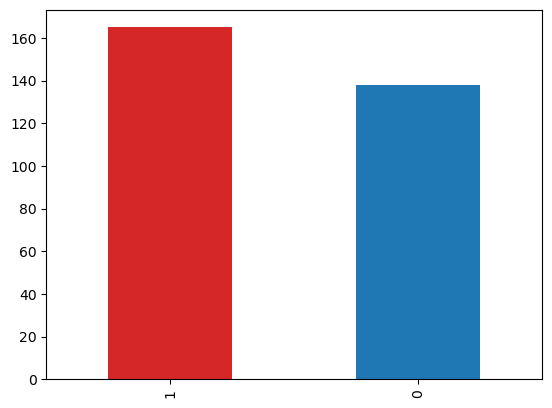

In [4]:
data['target'].value_counts().plot(kind='bar', color=['tab:red', 'tab:blue']);

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease by Gender

In [8]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

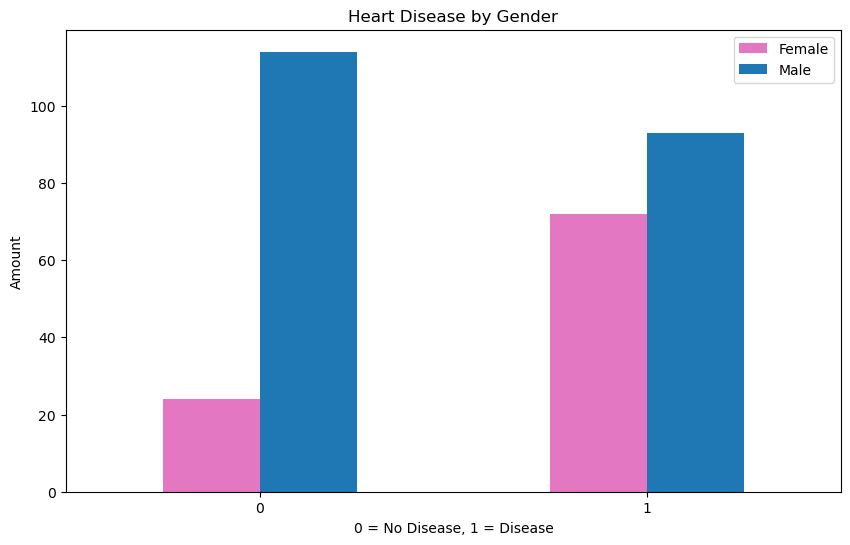

In [20]:
pd.crosstab(data.target, data.sex).plot(kind='bar', 
                                        figsize=(10,6),
                                        color=['tab:pink', 'tab:blue'])
plt.title('Heart Disease by Gender')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

Heart Disease by Age and Max Heart Rate

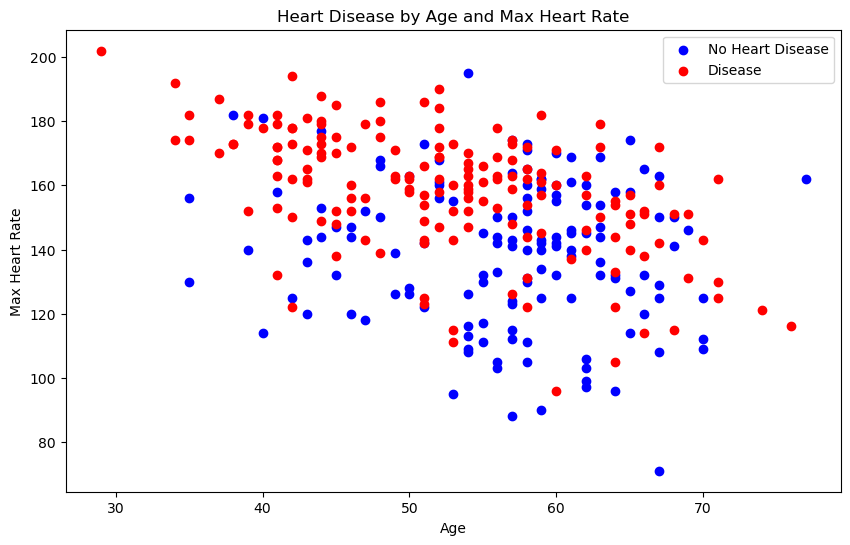

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c='blue');

plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c='red')

plt.title('Heart Disease by Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['No Heart Disease', 'Disease']);


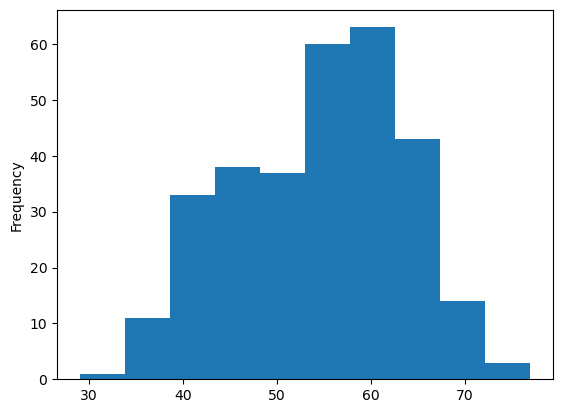

In [26]:
data.age.plot.hist();

### Heart Disease by Chest Pain Type

In [27]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

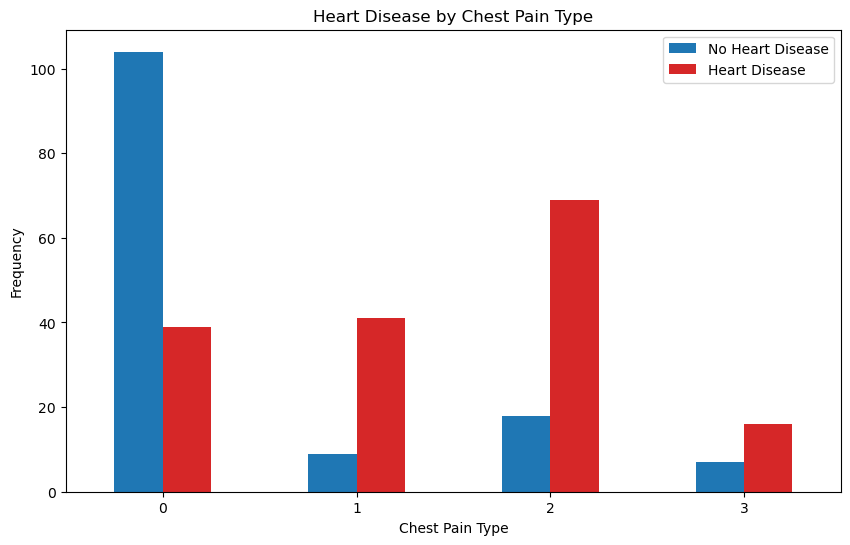

In [37]:
pd.crosstab(data.cp, data.target).plot(kind='bar',
                                      figsize=(10,6),
                                      color = ['tab:blue','tab:red'])
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)

### Correlation Matrix

In [38]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


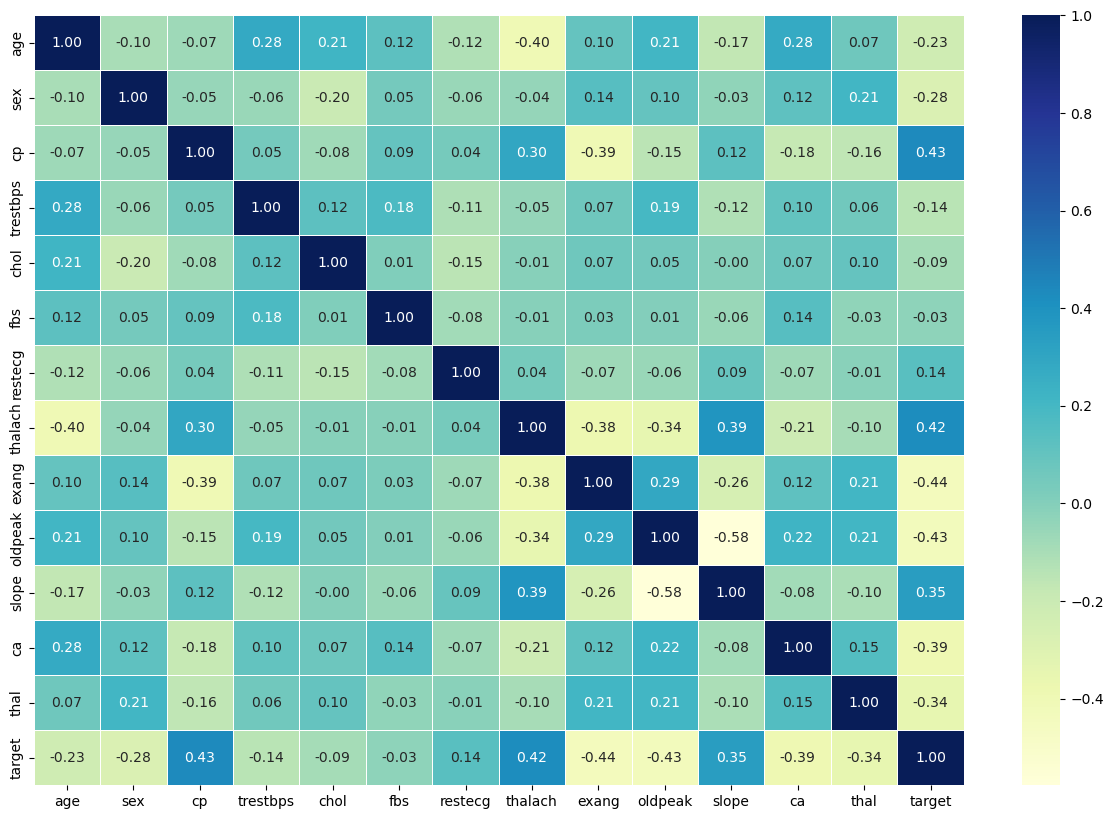

In [64]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

## 5. Modeling

In [70]:
# Split data into independent and target variables, training and testing data
x = data.drop('target', axis=1)
y = data['target']
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Try three machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [72]:
# Classification Models
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Testing Framework (fit and score)
def test_models(models, x_train, x_test, y_train, y_test):
    """
    Evaluate machine learning model on data
    model: machine learning models
    x_train: training data (no target variable)
    x_test: testing data (no target variable)
    y_train: target variable for training data
    y_test: target variable for testing data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [74]:
model_scores = test_models(models, x_train, x_test, y_train, y_test)
model_scores

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this 

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Baseline Model Comparison

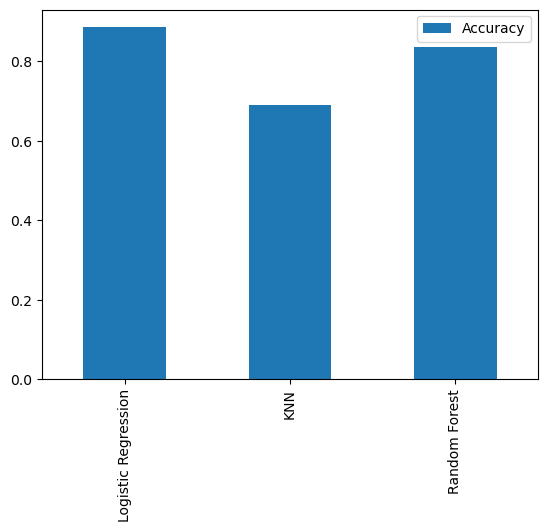

In [77]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

### Model Analysis
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under curve (AUC)


#### Hyperparameter Tuning

In [78]:
# KNN
train_scores = []
test_scores = []

# n_neighbors
neighbors = range(1, 21)

# Model
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))
    

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Max KNN score: 75.41%


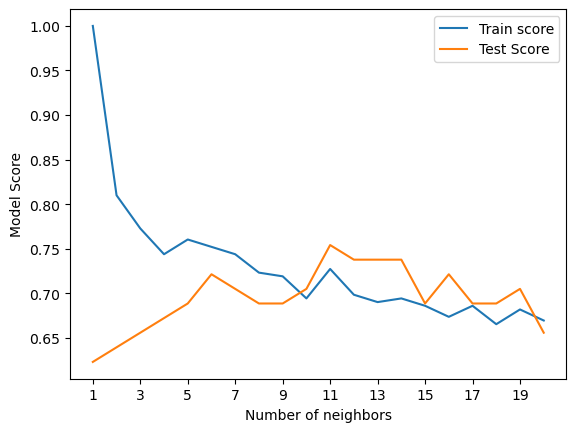

In [82]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test Score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1, 21, 2))
plt.legend()

print(f'Max KNN score: {max(test_scores)*100:.2f}%')

#### Hyperparameter Tuning using RandomizedSearchCV

In [112]:
# Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# Random Forest
rf_grid = {'n_estimators': np.arange(100, 350, 10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [113]:
# Tune LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [114]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [115]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [116]:
# Tune Random Forest Classifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50,
                           verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340])},
                   verbose=True)

In [117]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_depth': None}

In [118]:
rs_rf.score(x_test, y_test)

0.8688524590163934

#### Hyperparameter Tuning using GridSearchCV

In [119]:
# Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv = 5,
                         verbose=True)
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [120]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [121]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [123]:
# Random Forest
rf_grid_gs = {'n_estimators': np.arange(100, 251, 25),
          'max_depth': [None, 3, 5],
          'min_samples_split': [2, 4],
          'min_samples_leaf': [1, 5, 10, 15, 20]}

In [124]:
# Tune Random Forest Classifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid_gs,
                         cv = 5,
                         verbose=True)
gs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [125]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'n_estimators': 200}

In [126]:
gs_rf.score(x_test, y_test)

0.8688524590163934

#### Model Evaluation Metrics

In [128]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


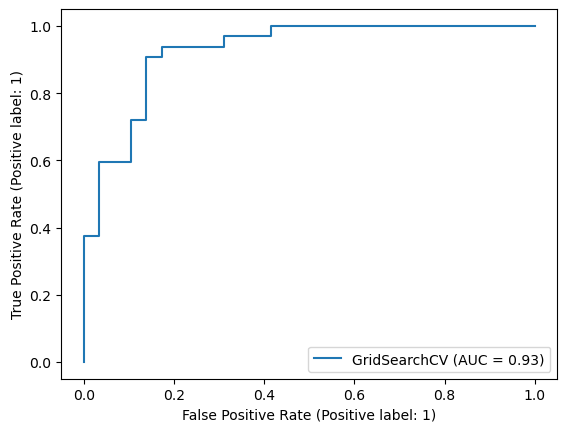

In [130]:
# Plot Receiver Operating Characteristic (ROC) curve
plot_roc_curve(gs_log_reg, x_test, y_test)

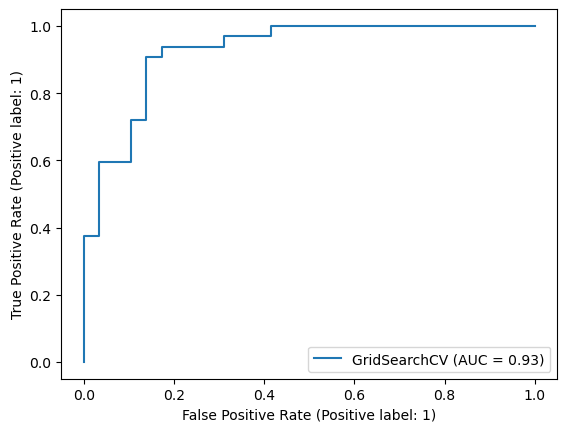

In [132]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

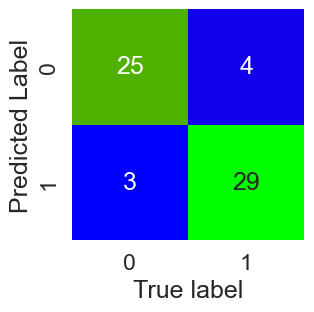

In [145]:
# Confusion Matrix

sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plot confusion matrix using heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False,
                    cmap='brg')
    plt.xlabel('True label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test, y_preds)